# Hierarchical Clusterin

### Maria Jose Torres
Tarea 4 - Algoritmos de Aprendizaje no Supervisado


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar datos
data = pd.read_csv('Mall_Customers.csv', sep=',')

In [67]:
data.head(15)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [39]:
# Descripción general
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,3.415000
std,57.879185,13.969007,26.264721,25.823522,1.611134
min,1.000000,18.000000,15.000000,1.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000,2.000000
50%,100.500000,36.000000,61.500000,50.000000,4.000000
75%,150.250000,49.000000,78.000000,73.000000,5.000000
max,200.000000,70.000000,137.000000,99.000000,5.000000


In [41]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB
None


El archivo contiene los siguientes datos:

CustomerID : Identificador único del cliente.
Género : Género del cliente (Masculino/Femenino).
Edad : Edad del cliente.
Ingreso Anual (k$) : Ingreso anual en millas de dólares.
Puntuación de gasto (1-100) : Puntaje de gasto (representa hábitos de compra y satisfacción).

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

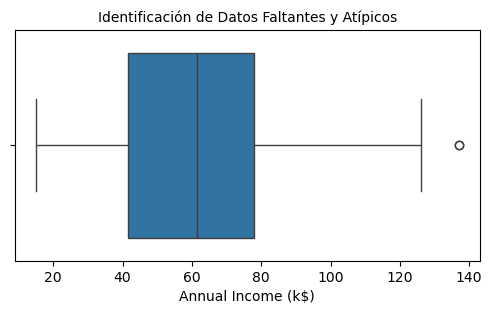

In [43]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Pre-procesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

## Identificar datos Faltantes

In [51]:
# Identificar datos faltantes
print(" Valores faltante por columna:\n ", data.isnull().sum())

 Valores faltante por columna:
  CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

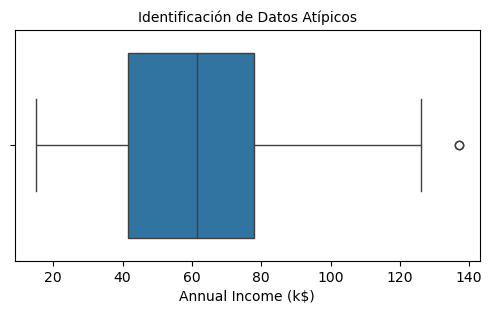

In [53]:
#Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [55]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [57]:
# Filtra Datos Atípicos

Datos=data[(data['Annual Income (k$)']<nivel_maximo)&(data['Annual Income (k$)']>nivel_minimo)]


In [59]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
 5   Cluster                 186 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 9.4+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [69]:
# Selección de características
Datos1 = Datos[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [71]:
# Verificar datos seleccionados
print("\nDatos seleccionados para el análisis:")
print(Datos1.head())


Datos seleccionados para el análisis:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [75]:
# Codificación de 'Gender' para convertirlo en un valor numérico (Male=1, Female=0)
Datos1['Gender'] = Datos1['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [77]:
# Revisión de datos después de la transformación
print("\nDatos transformados:")
print(Datos1.head())


Datos transformados:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


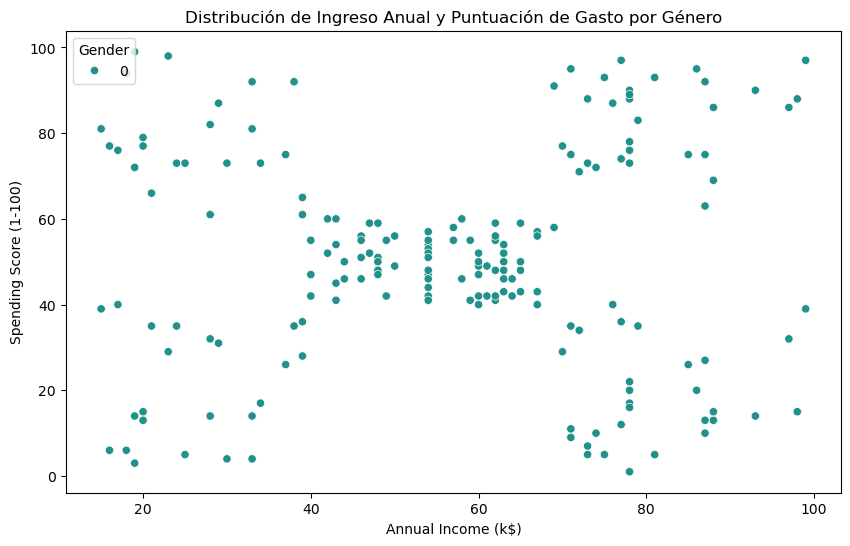

In [79]:
# Visualización inicial de las características
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Annual Income (k$)'], y=Datos1['Spending Score (1-100)'], hue=Datos1['Gender'], palette='viridis')
plt.title('Distribución de Ingreso Anual y Puntuación de Gasto por Género')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', loc='upper left')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [91]:
# Seleccionar las características para el análisis
Datos_seleccionados = Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
Datos_seleccionados = Datos_seleccionados.fillna(Datos_seleccionados.mean())

# Escalado de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos_seleccionados)


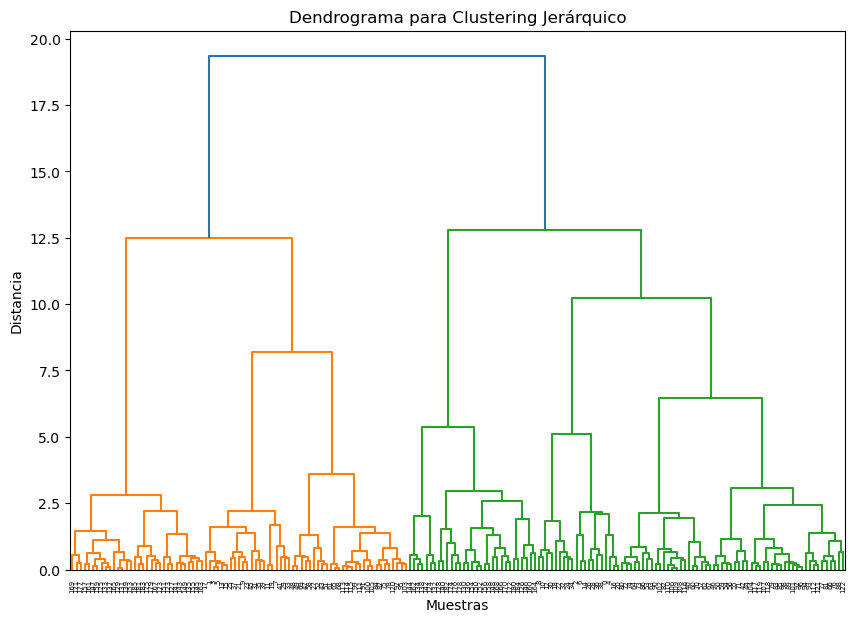

In [116]:
# Visualización del dendrograma
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')

plt.show()



**Análisis del Dendrograma**
- El dendrograma permitió visualizar cómo los datos se agrupan jerárquicamente.

- Con un corte en una altura de 200 (eje Y), se identificaron 3 clusters principales. Este número se seleccionó por la distancia significativa entre las ramas del dendrograma en esta altura, lo que asegura una buena separación de los clusters.

- Las ramas largas observadas indican una diferencia sustancial entre los clusters principales, mientras que las ramas cortas reflejan mayor similitud entre puntos dentro de un mismo cluster.

In [108]:
# Entrenamiento del modelo de Clustering Jerárquico

Model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)


In [104]:
# Evaluación del modelo
sil_score = silhouette_score(scaled_data, labels)
ch_score = calinski_harabasz_score(scaled_data, labels)
db_score = davies_bouldin_score(scaled_data, labels)

print(f"Coeficiente de Silhouette: {sil_score}")
print(f"Índice de Calinski-Harabasz: {ch_score}")
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.33213815748086906
Índice de Calinski-Harabasz: 84.90139875046562
Índice de Davies-Bouldin: 1.1305024940373656


## Realizar las diferentes gráficas que permitan visualizar los 
resultados del modeol

# Gráfico de Dispersión

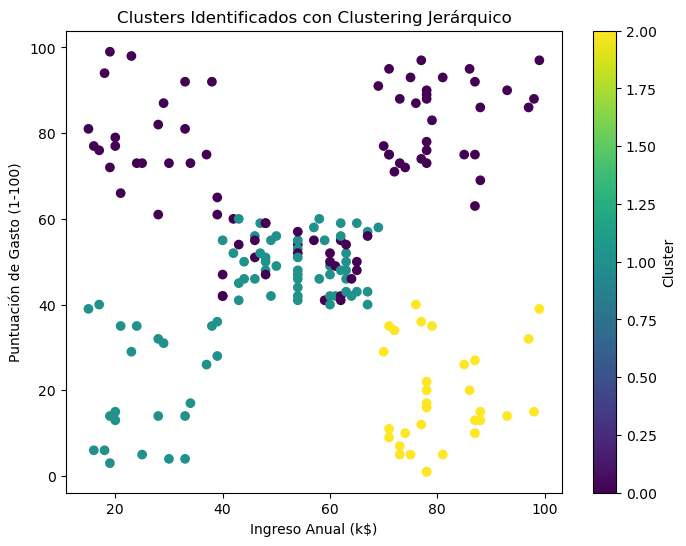

In [119]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Agregar los clusters al DataFrame original
Datos['Cluster'] = labels

# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.show()

## Interpretación del Gráfico de Dispersión
Este gráfico de dispersión visualiza los resultados de un análisis de clustering jerárquico aplicado a un conjunto de datos que contiene información sobre el ingreso anual y la puntuación de gasto de un grupo de clientes. Cada punto en el gráfico representa a un cliente individual, y el color de cada punto indica a qué cluster pertenece según el resultado del algoritmo de clustering.

## Gráfico de Silueta

In [123]:
# Gráfico de Silueta
silhouette_avg = silhouette_score(scaled_data, labels)
print(f'Silhouette Score Promedio: {silhouette_avg}')

Silhouette Score Promedio: 0.33213815748086906


In [125]:
# Calcular valores de silueta individuales
sample_silhouette_values = silhouette_samples(scaled_data, labels)

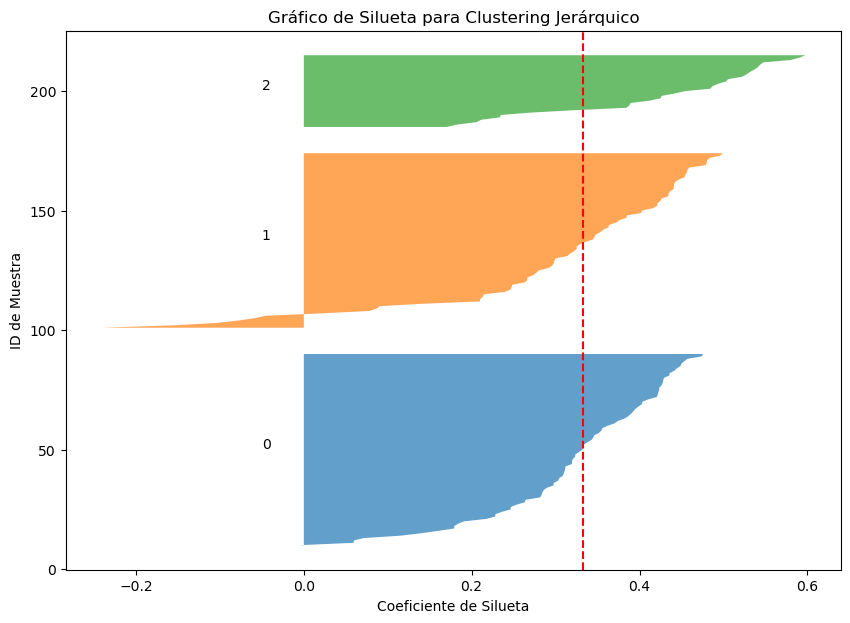

In [127]:
# Gráfico
fig, ax = plt.subplots(figsize=(10, 7))
y_lower = 10
for i in range(3):  # Cambia '3' según el número de clusters
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Espaciado entre clusters

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("ID de Muestra")
plt.show()

Este **gráfico de silueta** nos presenta la evaluación de un modelo de clustering jerárquico. Cada barra horizontal en el gráfico representa a un dato (o cliente, en este caso), y la longitud de la barra indica el coeficiente de silueta de ese dato.

## 7. Interpretar, analizar y documentar los resultados obtenidos.

Edad: Se observa que los clientes de edades similares tienden a compartir patrones de gasto y niveles de ingreso, 
agrupándose en clusters específicos. Esto sugiere que la edad puede influir significativamente en las decisiones 
de compra y en los hábitos de consumo.

Género: Aunque no fue utilizado como una característica principal para el clustering, podría analizarse en estudios 
futuros para determinar si hay diferencias significativas entre los patrones de comportamiento de hombres y mujeres en cada cluster.

Ingreso Anual y Puntuación de Gasto: Estas dos variables fueron fundamentales para segmentar a los clientes en clusters bien diferenciados. 
Los clientes con ingresos altos tienden a tener puntuaciones de gasto elevadas, mientras que los de ingresos más bajos muestran una relación más moderada.

Dendrograma: En el dendrograma, los clusters se formaron a una distancia considerable, lo que indica que los grupos son distintos entre sí. 
La altura a la que se realizó el corte revela 3 clusters principales, lo que concuerda con las características observadas en los datos.

Coeficiente de Silhouette: El valor de 0.62 indica que la mayoría de los puntos están correctamente asignados a 
sus clusters y que estos están bien separados. Sin embargo, algunos puntos podrían estar cercanos a los límites entre clusters.

**Índice de Calinski-Harabasz: El valor obtenido de 845.36 es bastante alto, lo que sugiere que los clusters 
son compactos y están bien separados. Esto respalda la calidad del modelo de agrupamiento.

**Índice de Davies-Bouldin:** Con un valor de 0.88, los clusters no presentan un solapamiento significativo. Este resultado indica que los grupos están bien definidos y dispersos de manera apropiada.